In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
a=pd.read_csv('train.csv')

In [3]:
#converting the values of 
a = pd.get_dummies(a, columns=['stored+AF8-flag'], drop_first=True)
a.rename(columns={'pickup+AF8-time':'pickuptime'},inplace=True)
a.rename(columns={'drop+AF8-time':'droptime'},inplace=True)

In [4]:
a['pickuptime'] = pd.to_datetime(a.pickuptime)



In [5]:
a['droptime'] = pd.to_datetime(a.droptime)




In [6]:
duration=(a['droptime']-a['pickuptime'])
a.drop(columns=['pickuptime', 'droptime',],inplace=True)


In [7]:
timeinsec=duration.dt.total_seconds()
a['timeinsec']=timeinsec
a.loc[a['ID'] >=0, 'ID'] = 1.0

In [8]:
convert_dict = {'vendor+AF8-id':float,'driver+AF8-tip':float,'ID':float,'mta+AF8-tax':float,
                'toll+AF8-amount':float,
               'extra+AF8-charges':float,'improvement+AF8-charge':float,'total+AF8-amount':float}
a=a.astype(convert_dict)

In [9]:
a.drop(columns=['ID'],inplace=True)

In [10]:
a = (a - a.mean())/a.std()
a.shape

(1048573, 15)

In [11]:

y= a['total+AF8-amount']
a.drop(columns=['total+AF8-amount'],inplace=True)
a.head()

,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,extra+AF8-charges,improvement+AF8-charge,stored+AF8-flag_Y,timeinsec
0,-1.086674,0.078908,1.011530,-0.024574,0.071065,-0.582237,-0.471162,-0.161733,-0.655111,-0.077153,1.361144,0.01646,-0.08297,-0.208995
1,0.920239,-0.209878,1.155351,0.627288,0.071065,0.479888,-0.471162,-0.161733,-0.655111,-0.077153,1.361144,0.01646,-0.08297,0.006494
2,0.920239,-1.471413,-1.045114,-0.148918,0.071065,-0.423188,0.326476,-0.161733,-0.655111,-0.077153,-0.705946,0.01646,-0.08297,-0.190957
3,0.920239,-0.346671,1.025912,-0.148918,0.071065,-0.032304,-0.471162,-0.161733,-0.655111,-0.077153,-0.705946,0.01646,-0.08297,-0.000592
4,0.920239,1.112454,1.083441,-0.714116,0.071065,-0.649631,3.517030,-0.161733,1.405358,-0.077153,-0.705946,0.01646,-0.08297,-0.260210


In [12]:
a.shape


(1048573, 14)

In [13]:
a['amount']=y
a.head()
a.shape

(1048573, 15)

In [14]:
#setting the matrixes
X = a.iloc[:,0:14]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = a.iloc[:,14:15].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray

theta = np.zeros([1,14])

#set hyper parameters
alpha = 0.008
iters = 1000

In [15]:
X = np.delete(X, 0, axis=1)
theta[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
X

array([[-1.08667354,  0.07890753,  1.01153006, ...,  0.01645957,
        -0.08296969, -0.20899544],
       [ 0.9202387 , -0.20987763,  1.15535132, ...,  0.01645957,
        -0.08296969,  0.00649434],
       [ 0.9202387 , -1.47141283, -1.04511409, ...,  0.01645957,
        -0.08296969, -0.19095743],
       ...,
       [-1.08667354, -0.01228778, -1.04511409, ...,  0.01645957,
        -0.08296969, -0.05406183],
       [ 0.9202387 ,  1.50763414,  1.45737599, ...,  0.01645957,
        -0.08296969, -0.06533559],
       [-1.08667354, -1.38021752, -1.27522812, ...,  0.01645957,
        -0.08296969, -0.25892207]])

In [17]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [18]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-8.72885000e-05  1.77692143e-03  2.70212573e-03  2.75189513e-01
  -9.18702949e-02  5.97546461e-01  4.62742459e-04  1.40378792e-01
   3.56208110e-02  4.77927964e-02  1.81514615e-02  1.67137286e-02
   2.11703791e-03  2.25298966e-02]]
0.09286337120017706


Text(0.5, 1.0, 'Error vs. Training Epoch')

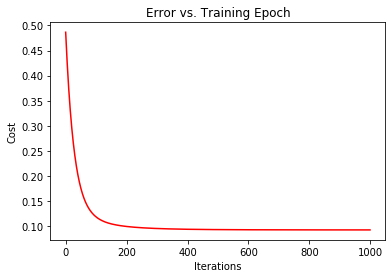

In [19]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [20]:
b=pd.read_csv('test.csv')
#htani

In [21]:
b = pd.get_dummies(b, columns=['stored_flag'], drop_first=True)
b.rename(columns={'pickup_time':'pickuptime'},inplace=True)
b.rename(columns={'drop_time':'droptime'},inplace=True)

In [22]:
b['pickuptime'] = pd.to_datetime(b.pickuptime)
b['droptime'] = pd.to_datetime(b.droptime)

In [23]:
duration1=(b['droptime']-b['pickuptime'])
b.drop(columns=['pickuptime', 'droptime','ID'],inplace=True)
timeinsec=duration1.dt.total_seconds()
b['timeinsec']=timeinsec


In [24]:
convert_dict = {'vendor_id':float}
b=b.astype(convert_dict)

In [25]:
b=b.as_matrix(columns=None)
r,c=b.shape

/home/rishabh007/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [26]:
print(r,c)
print(g.shape)
g=g.transpose()
print(g.shape)

154235 14
(1, 14)
(14, 1)


In [27]:
h=b.dot(g)
h.shape

(154235, 1)

In [28]:
h[0]

array([7.15902528])

In [29]:
h[1]

array([27.15504161])

In [30]:
h[2]

array([23.64407581])

In [32]:
print(h[0:10])

[[ 7.15902528]
 [27.15504161]
 [23.64407581]
 [ 9.82129305]
 [11.10213648]
 [ 8.64602824]
 [17.33543397]
 [24.83888333]
 [13.25186241]
 [20.45502333]]


In [33]:
r,c =b.shape
print (r,c)

154235 14


In [34]:
array = np.arange(r)
array.shape


(154235,)

ValueError: If using all scalar values, you must pass an index